In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

#### Parte 1: Numpy:
Para los ejercicios siguientes genere el código que considere para resolver el problema que se le plantea.

##### 1) ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [2]:
datos =np.array( list(range(1,1000)))
false = datos>2000 # booleano falso
true = datos<1001 # booleano verdadero

In [3]:
print("El tamaño en bytes del array tipo booleano 'Falso' es : {dato}".format(dato =sys.getsizeof(false) ) )
print("El tamaño en bytes del array tipo booleano 'verdadero' es : {dato}".format(dato =sys.getsizeof(true) ) )

El tamaño en bytes del array tipo booleano 'Falso' es : 1103
El tamaño en bytes del array tipo booleano 'verdadero' es : 1103


##### 2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [4]:
elementos_array = np.array([elementos for elementos in range(100, 0, -2)])
print("Los 10 últimos elementos del array son {elementos}".format(elementos = elementos_array[-10:]) )

Los 10 últimos elementos del array son [20 18 16 14 12 10  8  6  4  2]


##### 3) Dado el array
>  [[2,4,5,6],[ 0,3,7,4],[8,8,5,2],[1,5,6,1]] 

In [5]:
array =  np.array( [[2,4,5,6],[ 0,3,7,4],[8,8,5,2],[1,5,6,1]] )

In [6]:
print("seleccionando los elementos [1] del array  = {array} ".format(array = array[1]))

seleccionando los elementos [1] del array  = [0 3 7 4] 


In [7]:
print([array[0][0], array[0][2]]  , [array[2][0], array[2][2]])


[2, 5] [8, 5]


##### 4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [8]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])
media_aritmetica =  np.sum(a-b)/len(a)

In [9]:
print("La media aritmética de la diferencia (a-b) es: {mean}".format(mean = media_aritmetica ) )

La media aritmética de la diferencia (a-b) es: -0.25


##### 5) Tengo valores de cordenadas (x, y) en las columnas del array
> * [[1.33, 4.5],[30.0 ,10.7], [70.2 ,0.5]]
> * Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [10]:
coordenadas = np.array([[1.33,4.5],[30.0,10.7],[70.2,0.5]])

In [11]:
nuevas_coordenadas =np.array([37.1,-3.6])
coordenadas = np.append(coordenadas, [nuevas_coordenadas], axis = 0)
print("Las nuevas coordenadas son : {coor}".format(coor=coordenadas))

Las nuevas coordenadas son : [[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]


##### 6) Copie el array del ejercicio anterior. Traspóngalo (. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [12]:
transpuesta = np.transpose(coordenadas)
transpuesta

array([[ 1.33, 30.  , 70.2 , 37.1 ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 ]])

In [13]:
nue1 = np.array([[10.8,3.0],[35.8,12.0]] )
nuevas_coordenadas2 = np.append(transpuesta,np.atleast_2d(nue1).T, axis=1 )
print(nuevas_coordenadas2)

[[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]


#### Parte 2: Exploración y Minería de Datos:
Con el dataset nucleospoblacion.csv adjunto al laboratorio, luego responda las siguientes preguntas usando pandas y matplotlib.

In [47]:
df = pd.read_csv("NucleosPoblacion.csv")

In [48]:
# pasando las nombres de las columnas a minuscula para la facilidad de manejar los datos
name_columns = []
for i in df.columns:
    name_columns.append(i.lower())
df = df.rename(columns = dict(zip(df.columns, name_columns)) )
# Pasando los datos de la población a numeros enteros
df['poblacion'] = df.poblacion.astype(int)
df['codmun'] = df.codmun.astype(int)
df['codprovin'] = df.codprovin.astype(int)
df['provincia'] = df.provincia.astype(str)

#### 1) ¿Cuántos Municipios tienen más de 100,000 habitantes?.

In [16]:
def habitantes(data):
    hab = data.groupby(by = ['codmun']).agg({'poblacion': 'sum'} )
    hab = hab[hab.poblacion >100000]
    return print("{hab} municipios tienen más de 100,000 habitantes".format(hab=len(hab)))
habitantes(df)   

74 municipios tienen más de 100,000 habitantes


#### 2) Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayor y responda:
> 1. ¿Cuál es la segunda ciudad más poblada?
> 2. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

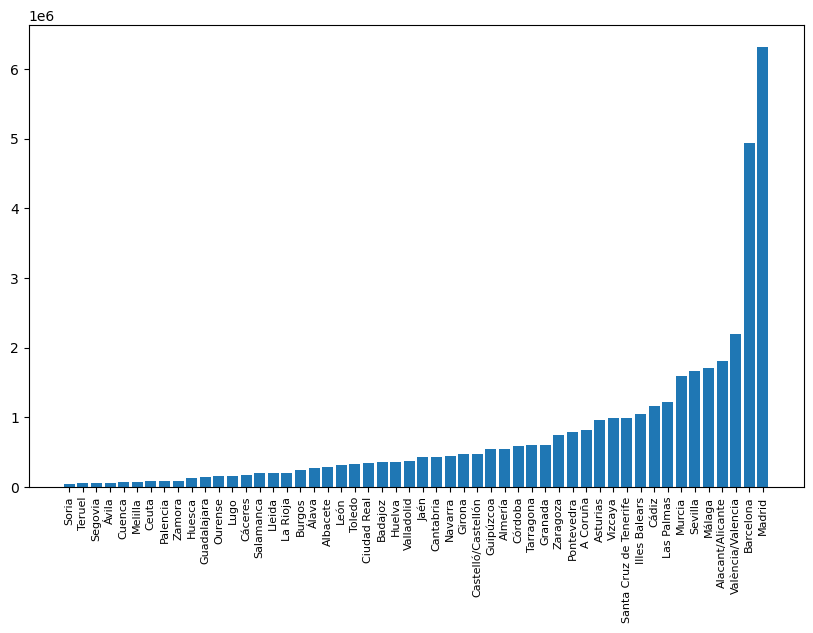

In [17]:
df1 = df.groupby('provincia').agg({'poblacion': 'sum'}).sort_values('poblacion', ascending = True)
plt.figure(figsize=(10, 6))
plt.bar(df1.index, df1['poblacion'])
plt.xticks(rotation=90, fontsize=8) # Rotamos las etiquetas del eje x para que se vean mejor
plt.show()

In [18]:
# 1.¿Cuál es la segunda ciudad más poblada?
print("La segunda ciudad más poblada es: {ciudad}".format(ciudad = df1.index[len(df1)-2] ))

La segunda ciudad más poblada es: Barcelona


In [19]:
posicion = len(df1)
for i, ciudad in enumerate(df1.sort_values('poblacion', ascending = False).index):
    if ciudad == 'Granada':
        posicion = i+1
print('Granada ocupa el puesto', posicion, 'en el ranking de las ciudades más pobladas')

Granada ocupa el puesto 17 en el ranking de las ciudades más pobladas


#### 3) ¿Cuántos municipios de Extremadura tienen más de 5,000 habitantes?.

In [20]:
def Extremadura(data):
    df = data[(data.provincia == "Cáceres")| (data.provincia == "Badajoz")  & (data.poblacion > 5000)]
    return print("{mun} municipios de Extremadura tienen más de 5,000 habitantes".format(mun = len(df)) )
Extremadura(df)

14 municipios de Extremadura tienen más de 5,000 habitantes


#### 4) ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [23]:
municipio_norte = df.loc[df['y'].idxmax()]
dfa= pd.DataFrame(municipio_norte).reset_index(inplace = False).rename(columns={104:"informacion", "index":"data"} )
print("El municipio situado más al norte es {}, pertenece a la provincia de {}. La población es de {}.  "\
      .format(dfa.iloc[5,1],dfa.iloc[7,1],dfa.iloc[3,1]  ) )

El municipio situado más al norte es Viveiro, pertenece a la provincia de Lugo. La población es de 16211.  


#### 5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [45]:
df[df.provincia == "Granada"].agg(
    media=('poblacion', 'mean'),
    mediana=('poblacion', 'median'),
    desviacion_estandar=('poblacion', 'std'),
    valor_maximo=('poblacion', 'max'),
    valor_minimo=('poblacion', 'min')
).round(0)

,poblacion
media,30218.0
mediana,17526.0
desviacion_estandar,50355.0
valor_maximo,239154.0
valor_minimo,10386.0


#### 6) Realice un histograma con la población de los Municipios para cada una de las provincias.

In [25]:
def histogramas(df):
    provincias = list(df['provincia'].unique())
    for i in range(0, len(provincias)):
        df_p = df[df['provincia'] == str(provincias[i]) ]
        fig, ax = plt.subplots()
        ax.hist(df_p['poblacion'])
        ax.set_title("Histograma de la población - Provincia {pro}".format(pro =provincias[i]), fontsize=10 )
        ax.set_xlabel("Invervalo de la población ", fontsize=8)
        ax.set_ylabel("Frecuencia", fontsize=8)
        plt.xticks(fontsize=8)
        plt.show()       

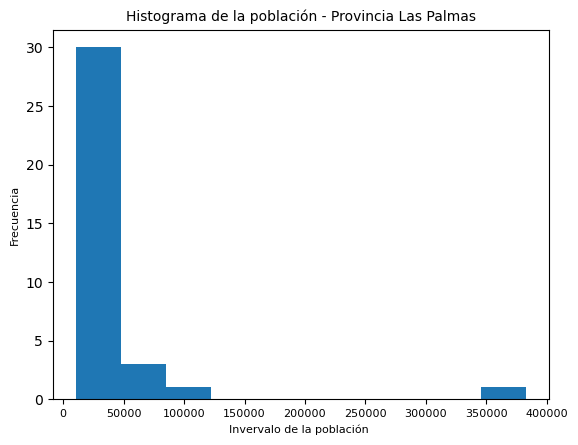

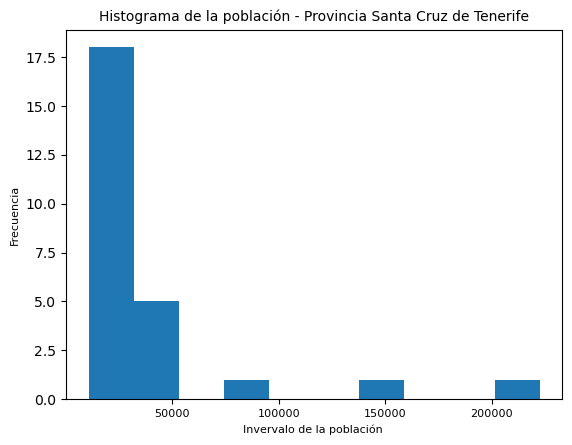

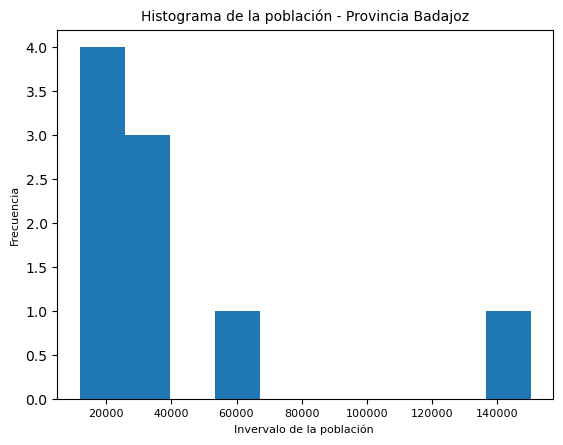

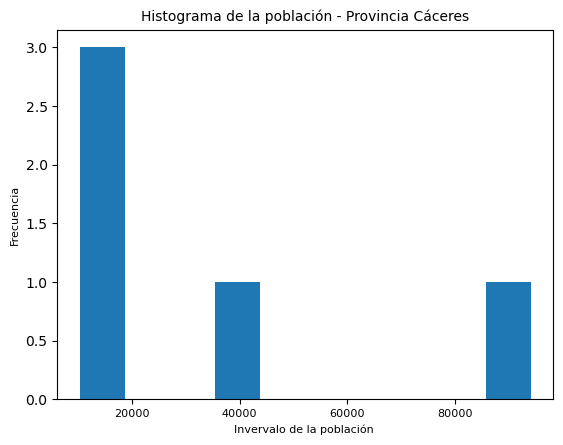

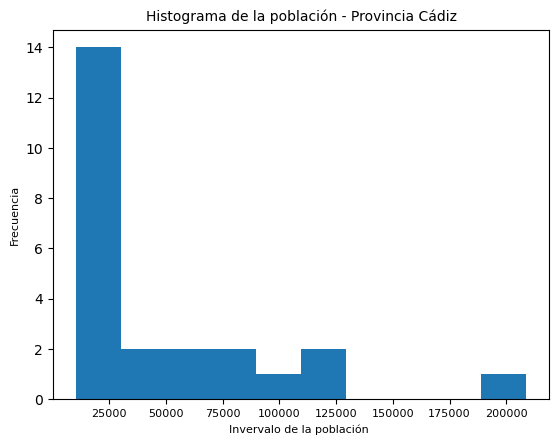

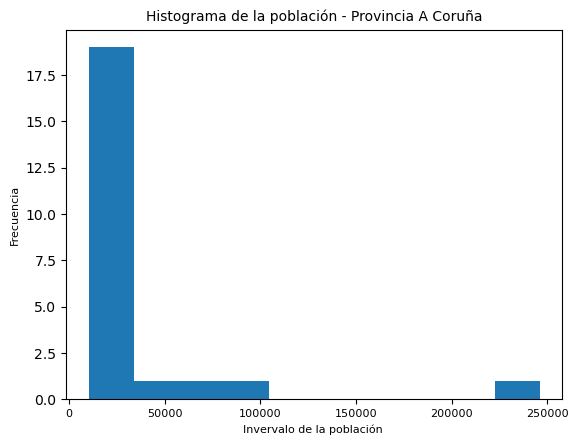

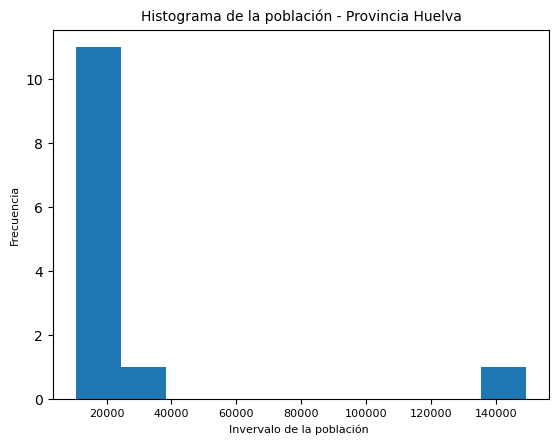

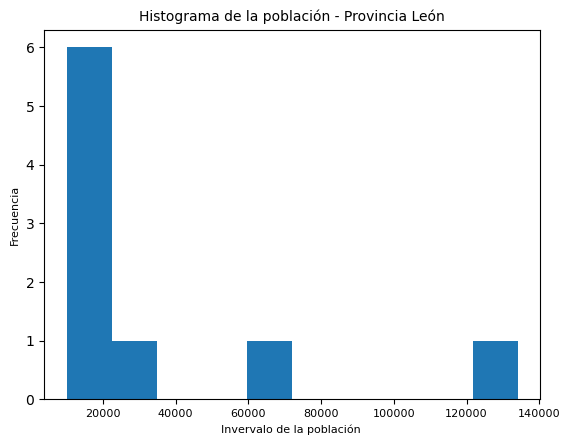

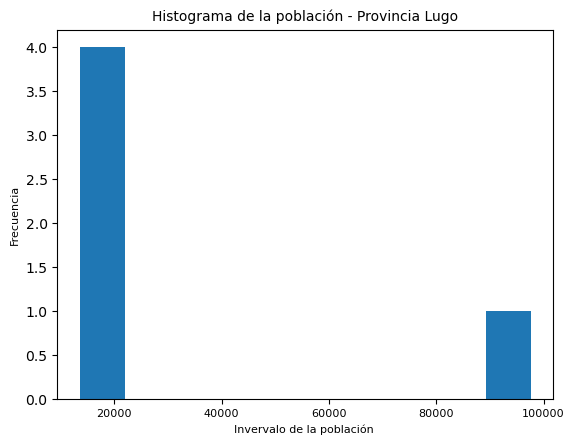

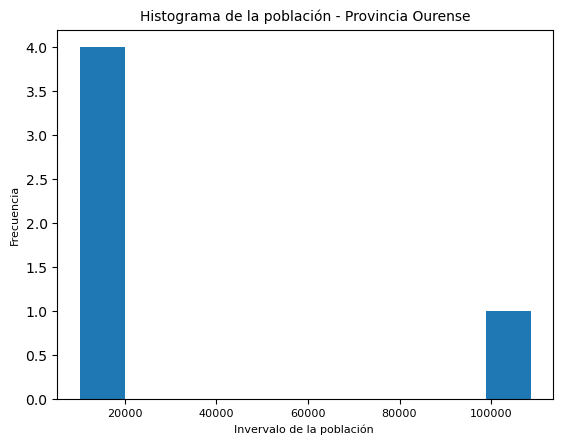

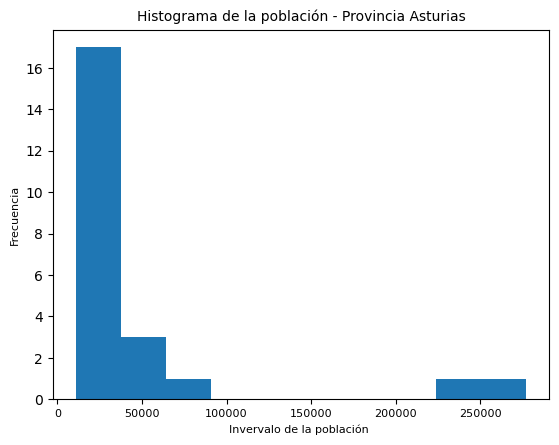

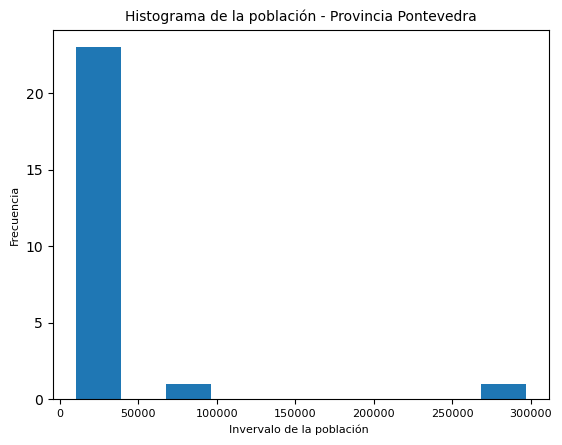

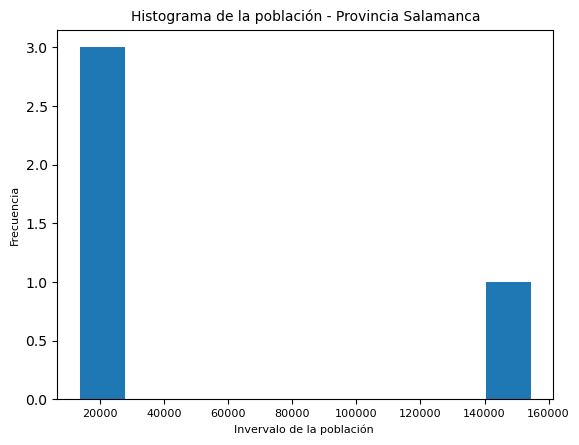

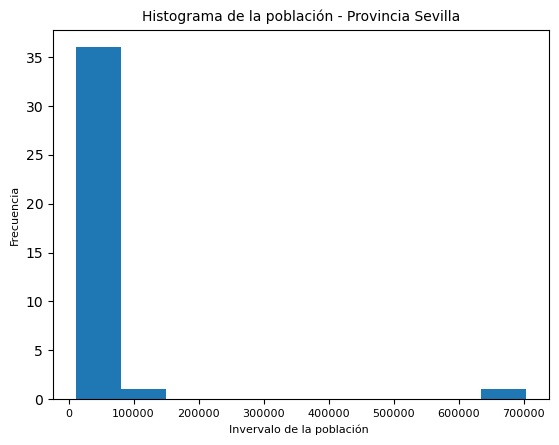

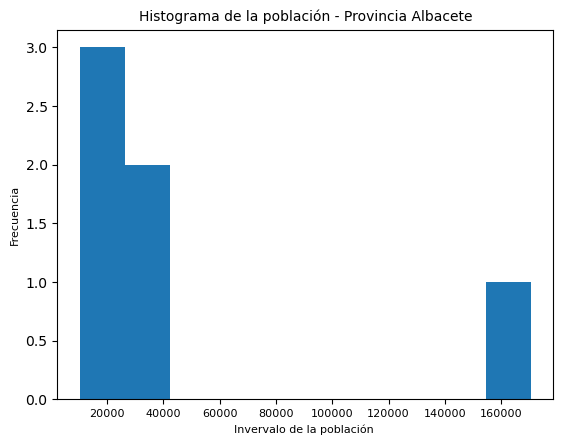

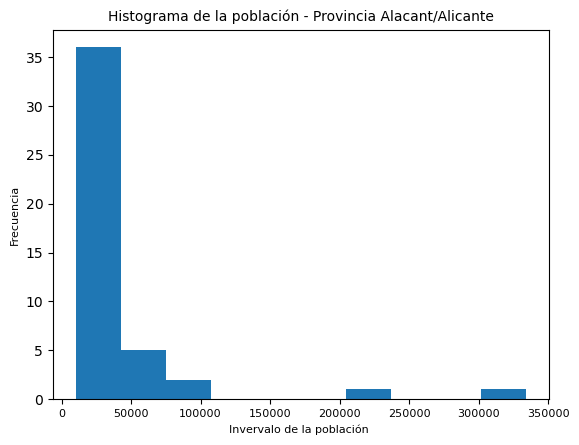

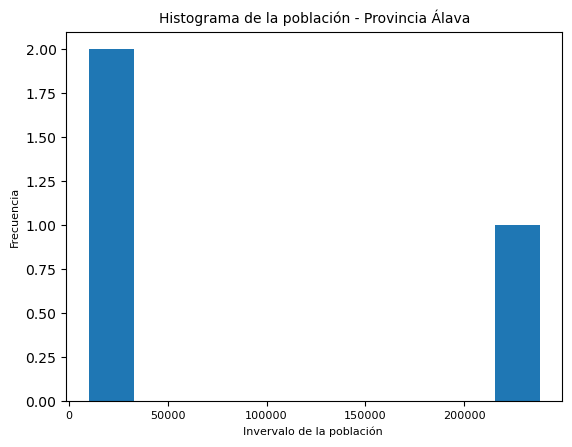

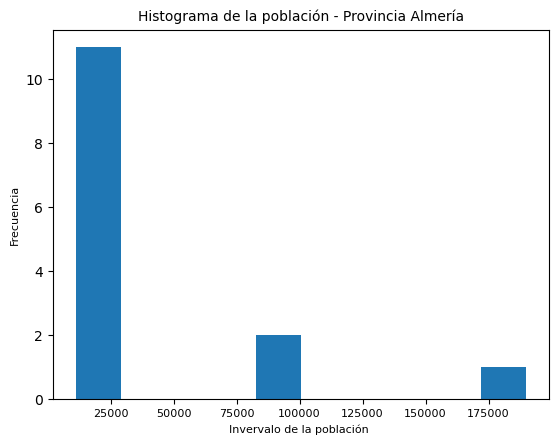

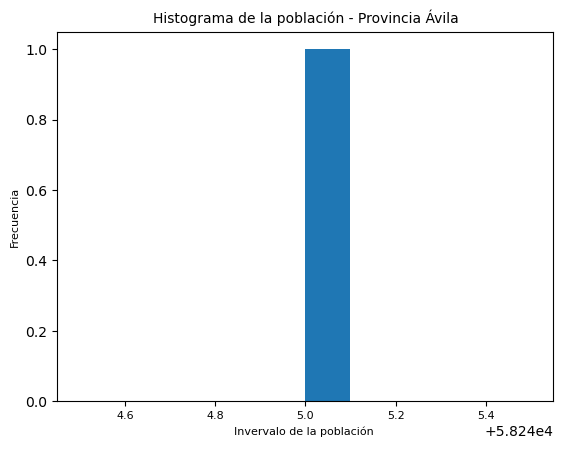

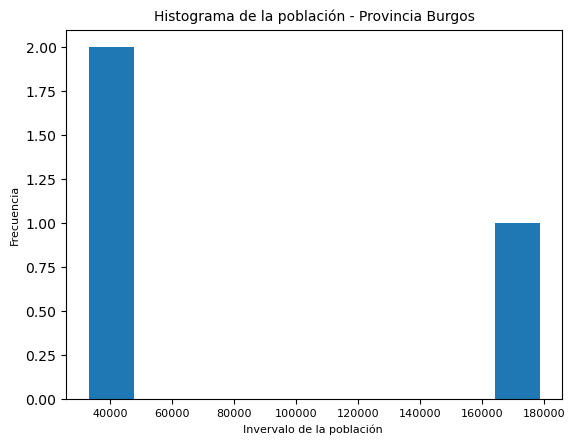

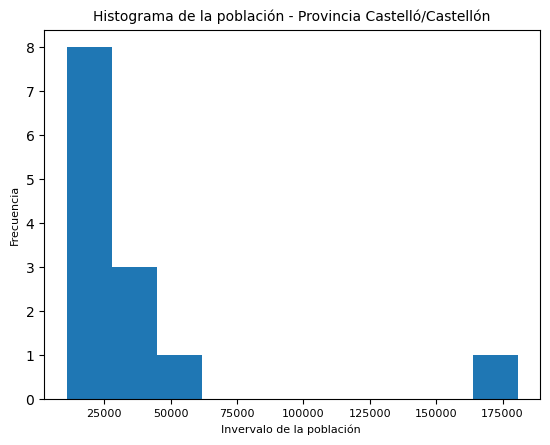

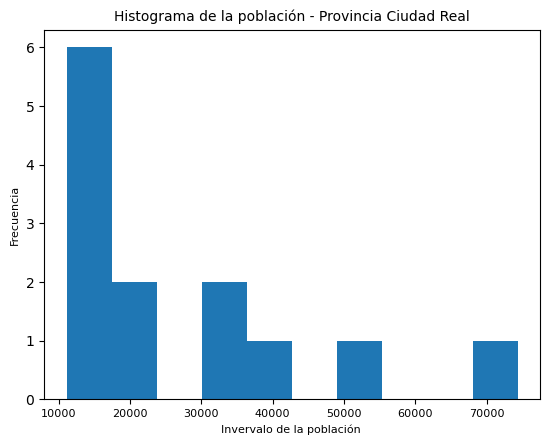

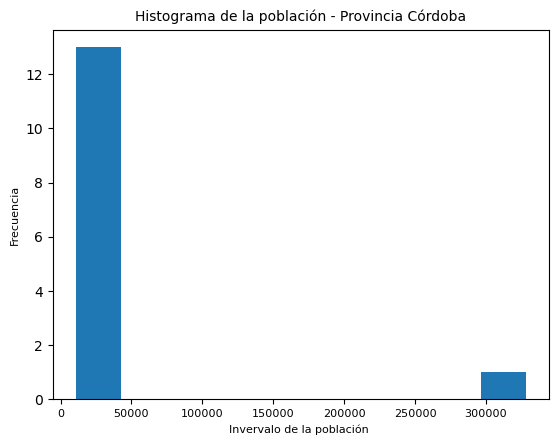

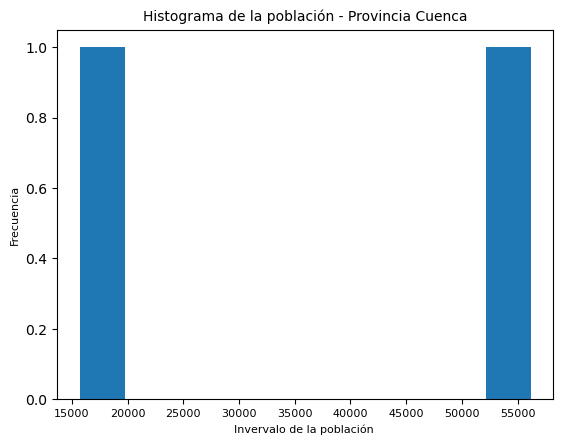

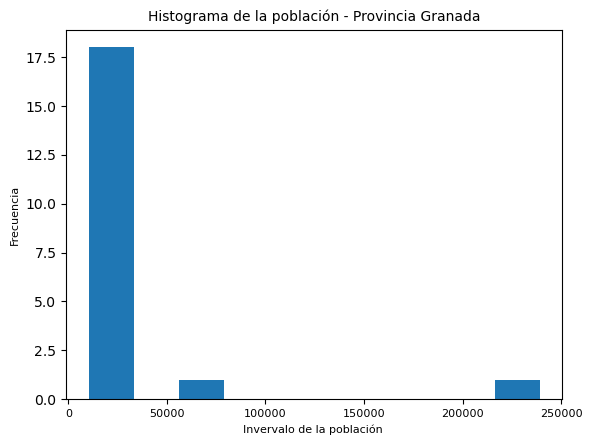

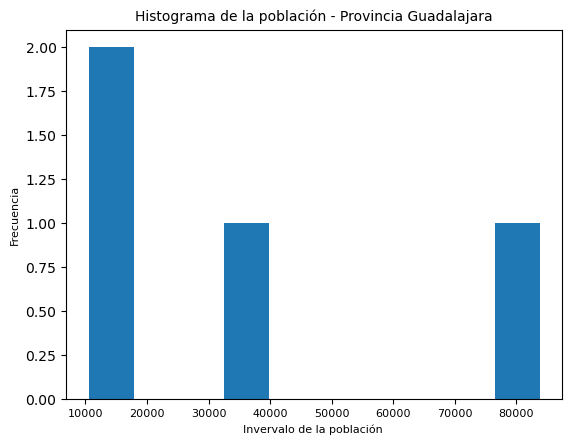

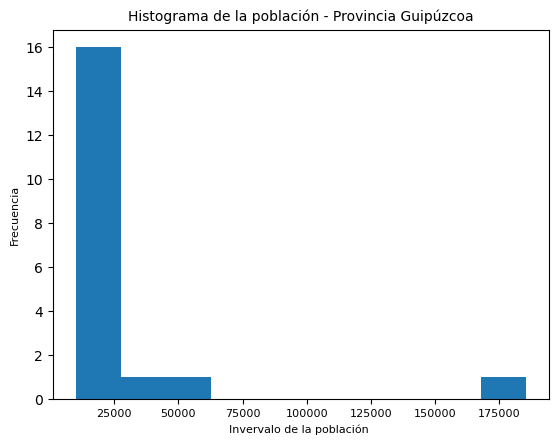

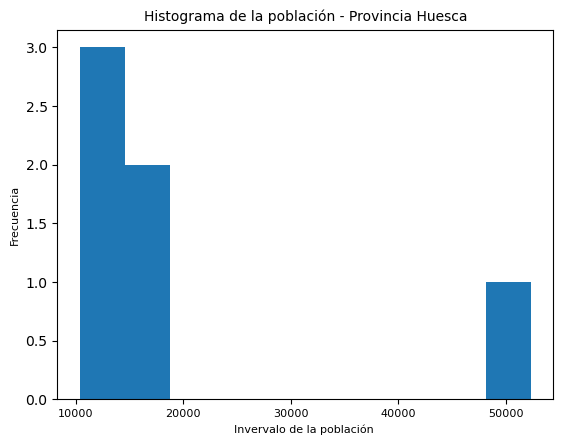

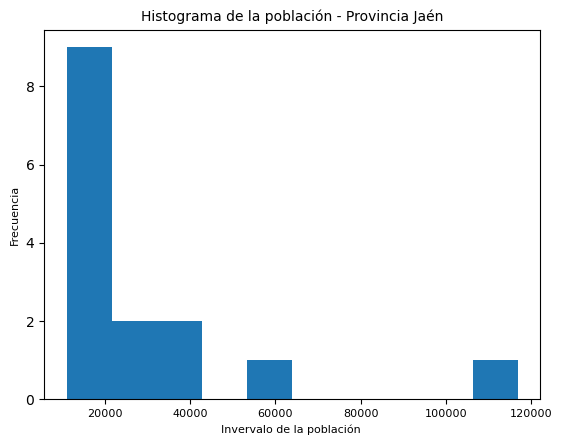

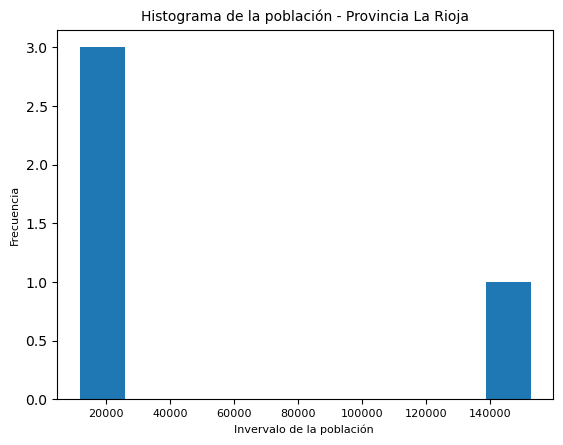

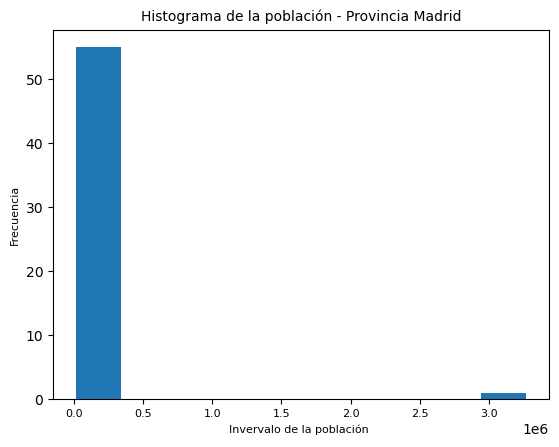

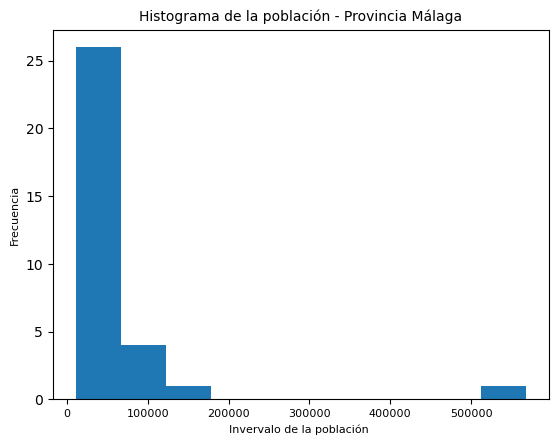

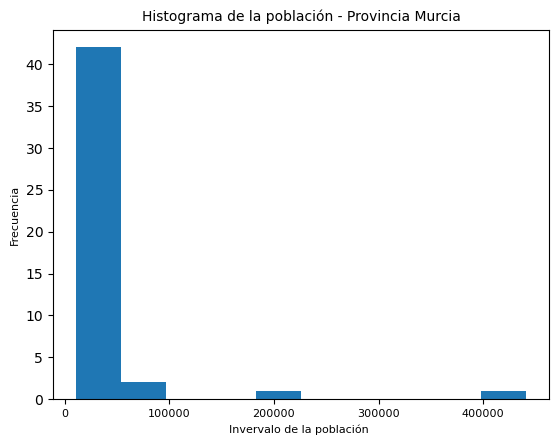

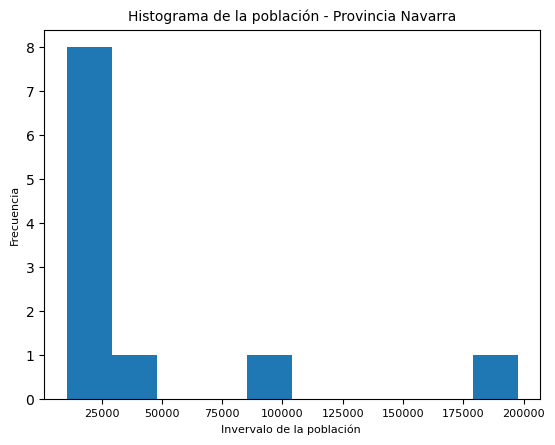

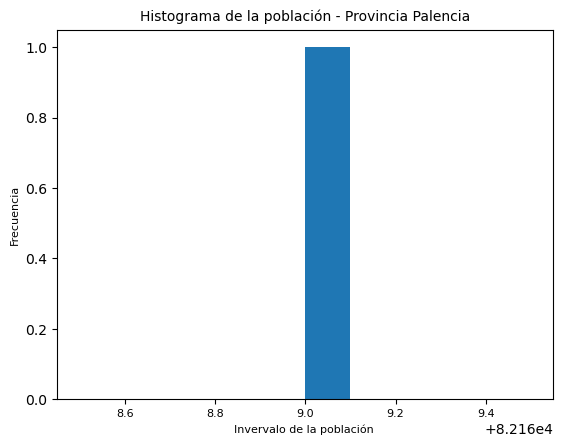

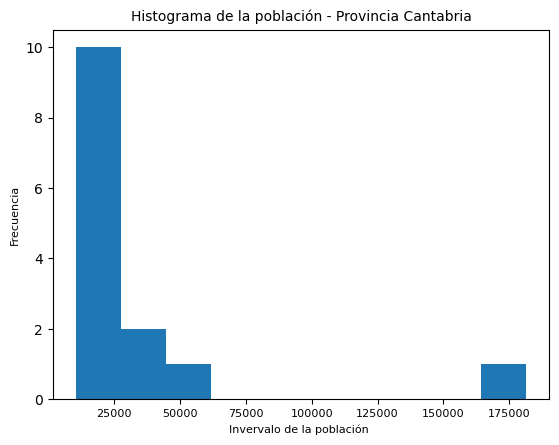

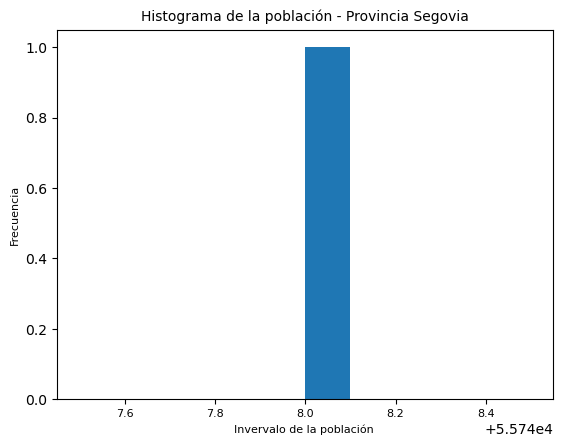

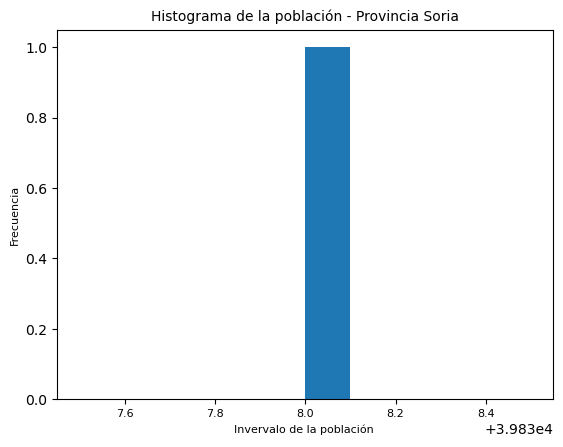

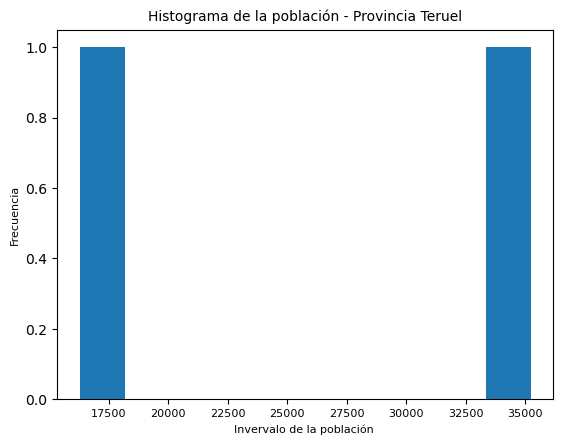

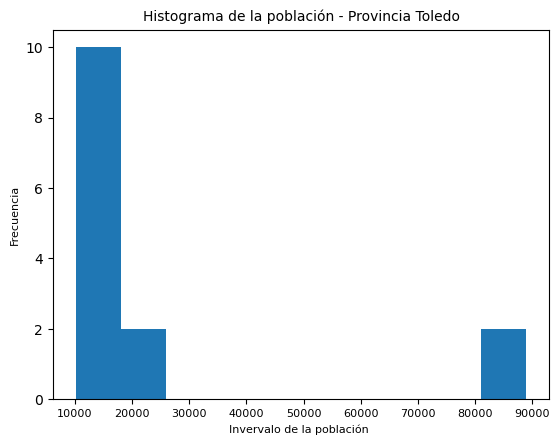

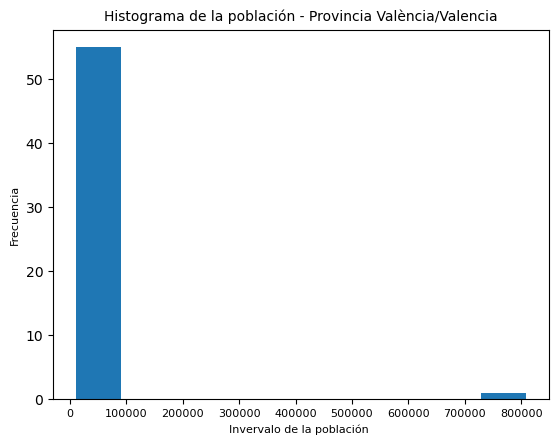

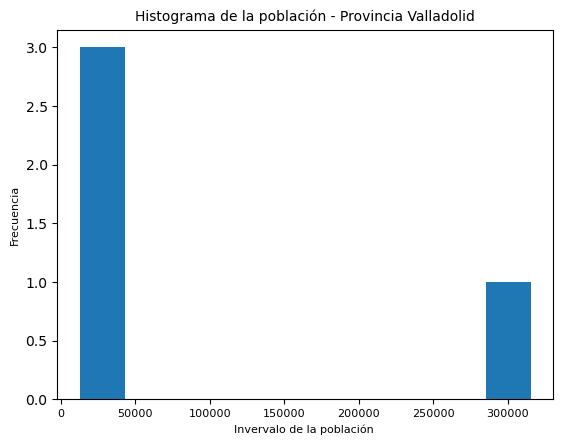

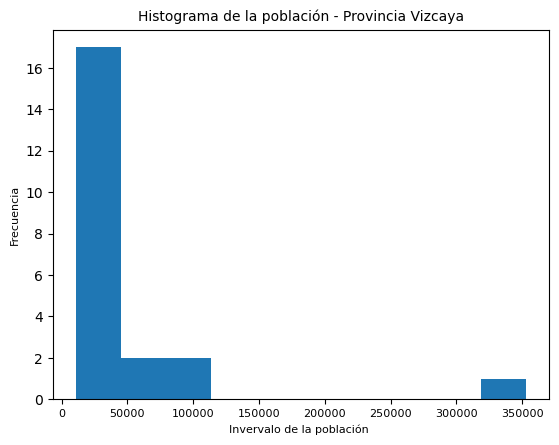

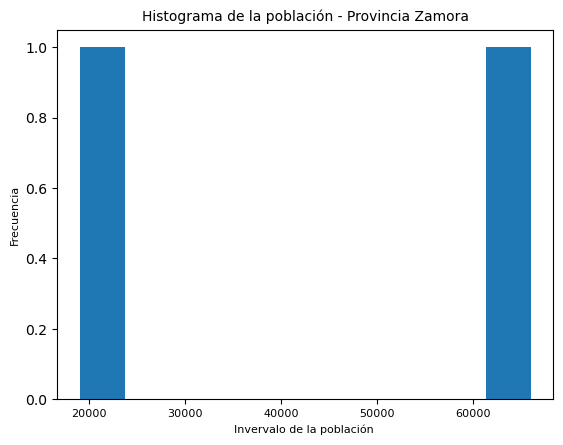

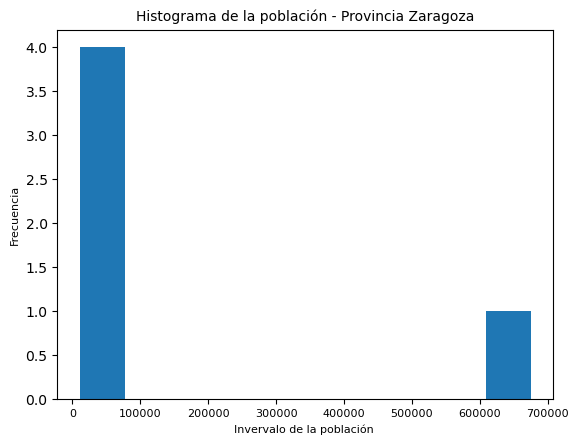

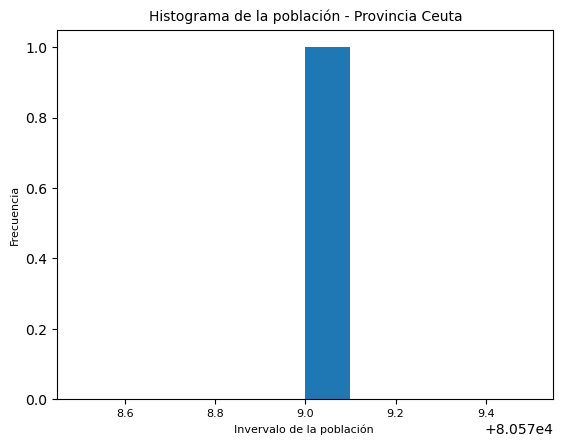

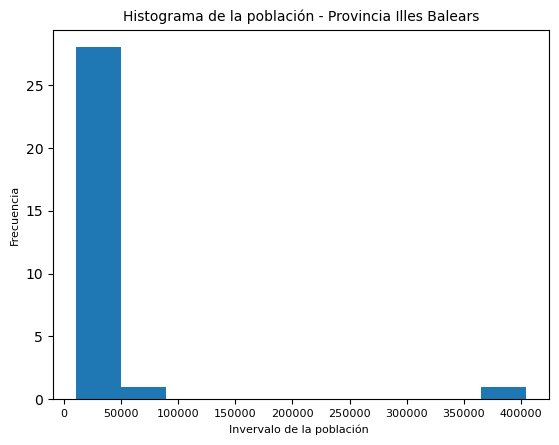

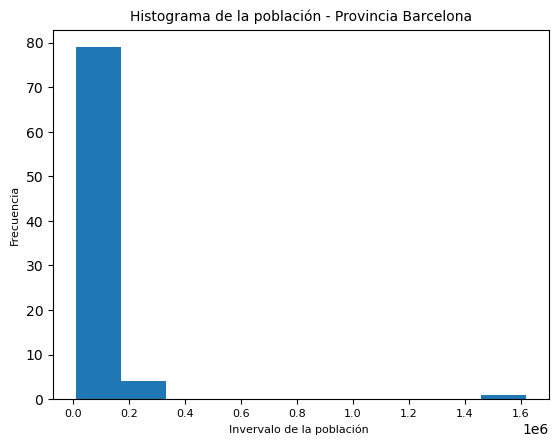

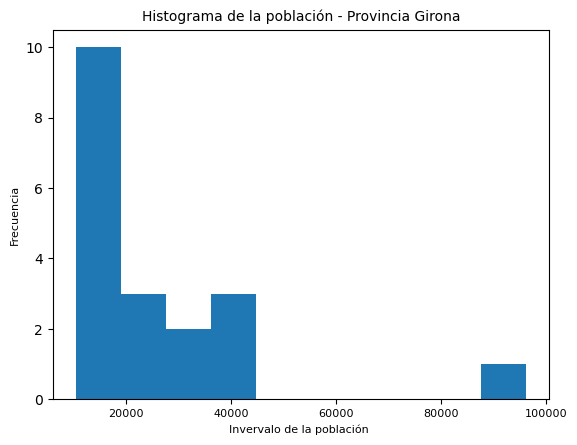

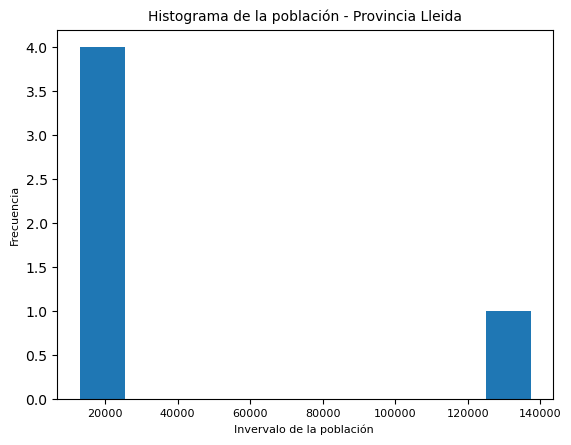

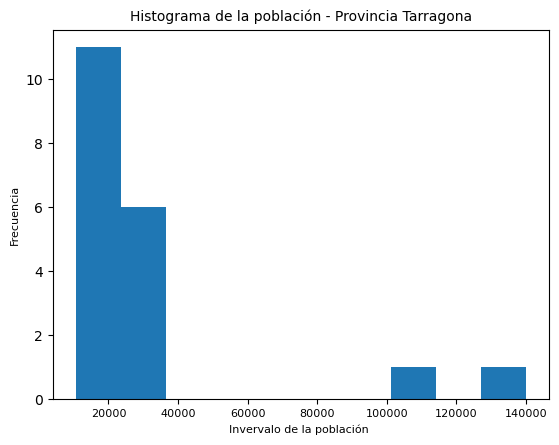

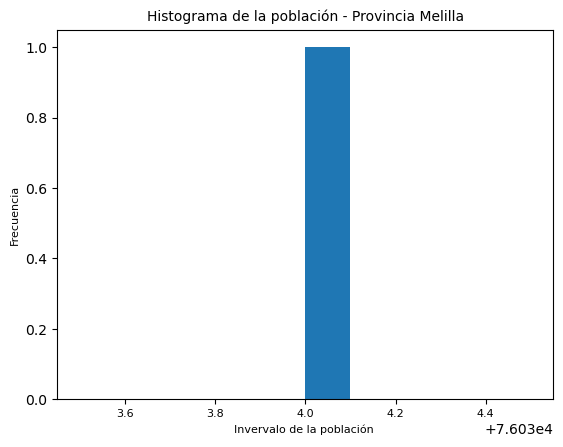

In [98]:
histogramas(df)

#### 7) Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [43]:
def selec_azar(df):
    df_azar = df.groupby(by = ['codmun', 'municipio'])\
                .agg({'poblacion': 'sum'}).reset_index(drop = False)\
                .sample(n=50, replace = False).reset_index(drop = True)\
                .agg( media= ('poblacion', 'mean'),desviacion_estandar=('poblacion', 'std') ).round(0)
    return df_azar

In [44]:
selec_azar(df)

,poblacion
media,50076.0
desviacion_estandar,68523.0


#### 8) Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

##### Fórmula Haversina

La fórmula de Haversine es una ecuación matemática utilizada para calcular la distancia en una esfera entre dos puntos que se encuentran en su superficie. En particular, es muy útil para calcular distancias entre puntos en la Tierra, que es aproximadamente una esfera. La fórmula se llama así por el matemático británico del siglo XIX, Edward Haversine, que fue el primero en publicarla.

La fórmula de Haversine utiliza las coordenadas de latitud y longitud de dos puntos para calcular su distancia a través de la curvatura de la Tierra.

In [68]:
def distancia(lat1, lon1, lat2, lon2):
    R = 6371  # Es el radio de la Tierra en km. Cuando se calcule se sabra cuanta distancia hay en km
    # Formula de la ecuación de Haversina
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    a = np.sin(dLat / 2) * np.sin(dLat / 2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dLon / 2) * np.sin(dLon / 2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    d = R * c
    return d

# coordenadas de Madrid para agregarlas a la función
madrid_lat, madrid_lon = 40.480332, -3.369251

#Latitud de madrid =  40.480332
#Longitud de madrid =  -3.369251

In [79]:
# calcular la distancia entre cada municipio y Madrid y agregarla como una nueva columna al DataFrame
df_nuevo = df[df['provincia'] != "Madrid"].drop_duplicates(subset=['codmun']) 
df_nuevo['dist_a_madrid'] = df_nuevo.apply(lambda columna: distancia(madrid_lat,  madrid_lon, columna['y'], columna['x']), axis=1)


##### Los 10 municipios más lejanos

In [92]:
df_nuevo = df_nuevo.sort_values('dist_a_madrid',ascending = False).reset_index()

In [94]:
print(df_nuevo[['municipio','dist_a_madrid']].head(10))

                municipio  dist_a_madrid
0   Los Llanos de Aridane    1866.335175
1  Santa Cruz de la Palma    1854.609886
2                   Adeje    1838.289604
3                   Arona    1836.958284
4           Guía de Isora    1833.512617
5     San Miguel de Abona    1833.040481
6     Granadilla de Abona    1828.949861
7      Santiago del Teide    1828.292786
8       Icod de los Vinos    1815.633792
9            Los Realejos    1806.934564


##### Los 10 municipios más cercanos

In [96]:
df_nuevo = df_nuevo.sort_values('dist_a_madrid',ascending = True).reset_index()

In [97]:
print(df_nuevo[['municipio','dist_a_madrid']].head(10))

             municipio  dist_a_madrid
0  Azuqueca de Henares      13.337421
1              Alovera      16.565713
2          Guadalajara      24.486194
3             El Casar      25.173173
4               Seseña      50.308346
5             Illescas      56.794513
6                Ocaña      58.881893
7             Tarancón      60.742794
8              Segovia      82.374443
9           Fuensalida      85.815320
